# Hoja de trabajo 5.

#### Roberto Ríos, 20979
#### Javier Valle, 20159

In [97]:
# Imports necesarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt
import graphviz
from sklearn.naive_bayes import GaussianNB

# Ejercicio 1.

#### Use los mismos conjuntos de entrenamiento y prueba que utilizó en las dos hojas anteriores.

### OverallCond y OverallQual.

Accourancy: 0.2785388127853881
Precisión:  0.1640052564510991


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


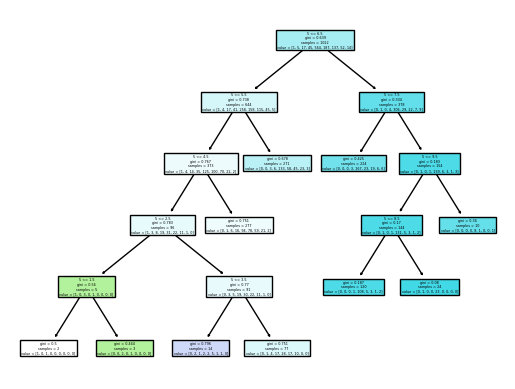

In [46]:
# Use los mismos conjuntos de entrenamiento y prueba que usó para los árboles de decisión en la hoja de trabajo anterior.
df = pd.read_csv('train.csv') # Datos.

df = df.replace(to_replace="", value=0)
df = df.fillna(0)
cat = df.select_dtypes(include=['object']).columns.to_list()
num = df.select_dtypes(include=['number']).columns.to_list()
x = pd.DataFrame()
x[num] = df[num]
x[cat] = df[cat].apply(lambda x: pd.factorize(x)[0])
res = "OverallCond"

# # Imprimiendo la columna de preios y de condición.
# df["SalePrice"]
# df["OverallCond"]
# df["OverallQual"]
# Imprimiendo columnas numéricas.


x = df["OverallCond"]
y = df["OverallQual"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


# Haciendo reshape.
calidad = y_train.values.reshape(-1, 1)
condicion = X_train.values.reshape(-1, 1)

calidad_t = y_test.values.reshape(-1, 1)
condicion_t = X_test.values.reshape(-1, 1)


# Crear un modelo de árbol de decisión
clf = DecisionTreeClassifier(max_depth=20)

# Entrenar el modelo con los datos de entrenamiento
clf.fit(calidad, condicion)

tree.plot_tree(clf, feature_names=df["OverallCond"], filled=True)

# Predecir los resultados con los datos de prueba
y_pred = clf.predict(condicion_t)

# Evaluar el accurancy del modelo.
accuracy = accuracy_score(calidad_t, y_pred)
print("Accourancy:", accuracy)

# Evaluar la precisión del modelo.
precision = precision_score(calidad_t, y_pred, average='weighted')
print("Precisión: ", precision)


### Clasificación.

Accourancy: 1.0
Precisión:  1.0


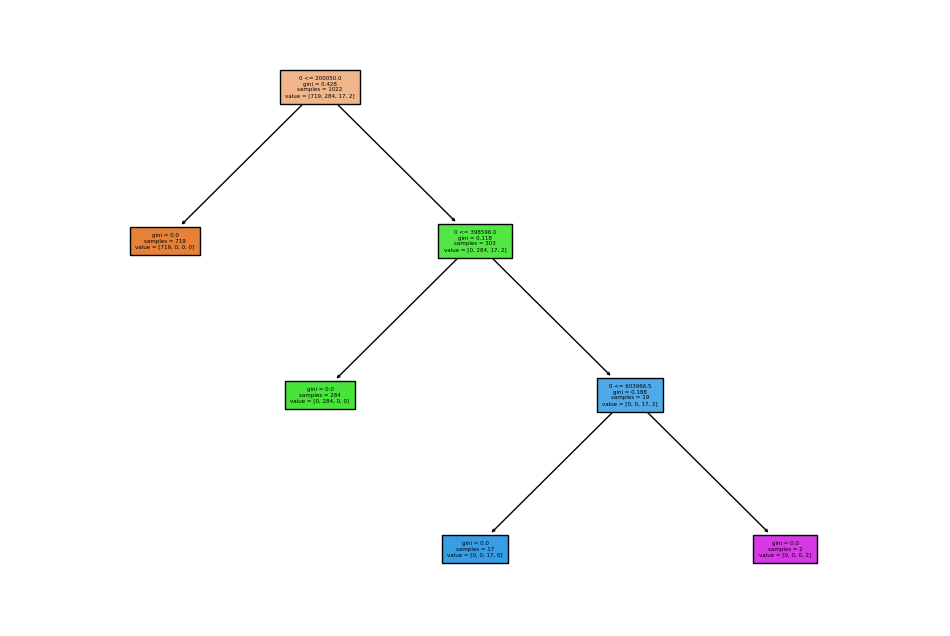

In [83]:
# Cargar y limpiar el conjunto de datos
data = pd.read_csv('archivo_clasificado.csv')
data = data.replace(to_replace='',value=0)
data = data.fillna(0)
cat = data.select_dtypes(include=['object']).columns.to_list()
num = data.select_dtypes(include=['number']).columns.to_list()
x = pd.DataFrame()
x[num] = data[num]
x[cat] = data[cat].apply(lambda x: pd.factorize(x)[0])
res = 'Clasificacion'
X = x.drop(res, axis=1)
y = data[res]

# print(X.shape)
# print(y.shape)
# print(X)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crea un clasificador de árbol de decisión
clf = tree.DecisionTreeClassifier( max_depth=4 )

# Entrena el clasificador en el conjunto de entrenamiento
clf.fit(X_train, y_train)


# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, fontsize=4, feature_names=y, filled=True)

# Accurancy.
accuracy = accuracy_score(y_test, y_pred)
print("Accourancy:", accuracy)

# Precisión.
precision = precision_score(y_test, y_pred, average='weighted')
print("Precisión: ", precision)

#### Modelos con el precio.

In [125]:
# Cambiando la profundiad a 3 (o sea dos profundidades menos que la primera predicción)

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

datos = pd.read_csv('train.csv')


# Obteniendo las variables numéricas en una matriz.
X = datos.select_dtypes(include=['int', 'float']).values

#X

# Reemplazando los NaN por ceros.
X = np.nan_to_num(X)

X

# Variable a predecir.
y = datos["SalePrice"].values

# Quitando los NaN de y.
#y = y[~np.isnan(y)]

y = np.nan_to_num(y)

# Creando el árbol.
arbol = DecisionTreeRegressor(max_depth=3)

# Ajustando el árbol.
arbol.fit(X, y)

#arbol

# Prediciendo los valores.

score = arbol.score(X, y)

print("Precisión:", score)

dot_data = export_graphviz(
    arbol,
    out_file=None,
    feature_names=datos.select_dtypes(include=['int', 'float']).columns,
    class_names=["SalePrice"],
    filled=True,
    rounded=True,
    special_characters=True
)


graph = graphviz.Source(dot_data)
graph.render("Árbol_p3")


# Haciendo los cálculos.
# Prediciendo el precio con el árbol de decisión.

y = datos.select_dtypes(include=[np.number])

y

# Convirtiendo los NaN a número.
y = np.nan_to_num(y)

# Prediciendo el precio.
y_pred = arbol.predict(y)

print("Predicción con 3 de profundidad: ", y_pred)



# Profundidad 3
datos = pd.read_csv('train.csv')


# Obteniendo las variables numéricas en una matriz.
X = datos.select_dtypes(include=['int', 'float']).values

#X

# Reemplazando los NaN por ceros.
X = np.nan_to_num(X)

X

# Variable a predecir.
y = datos["SalePrice"].values

# Quitando los NaN de y.
#y = y[~np.isnan(y)]

y = np.nan_to_num(y)

# Creando el árbol.
arbol = DecisionTreeRegressor(max_depth=4)

# Ajustando el árbol.
arbol.fit(X, y)

#arbol

# Prediciendo los valores.

score = arbol.score(X, y)

print("Precisión:", score)

dot_data = export_graphviz(
    arbol,
    out_file=None,
    feature_names=datos.select_dtypes(include=['int', 'float']).columns,
    class_names=["SalePrice"],
    filled=True,
    rounded=True,
    special_characters=True
)


graph = graphviz.Source(dot_data)
graph.render("Árbol_p4")


# Haciendo los cálculos.
# Prediciendo el precio con el árbol de decisión.

y = datos.select_dtypes(include=[np.number])

y

# Convirtiendo los NaN a número.
y = np.nan_to_num(y)

# Prediciendo el precio.
y_pred = arbol.predict(y)

print("Predicción con 4 de profundidad: ", y_pred)




# Profundidad de 7.

datos = pd.read_csv('train.csv')


# Obteniendo las variables numéricas en una matriz.
X = datos.select_dtypes(include=['int', 'float']).values

#X

# Reemplazando los NaN por ceros.
X = np.nan_to_num(X)

X

# Variable a predecir.
y = datos["SalePrice"].values

# Quitando los NaN de y.
#y = y[~np.isnan(y)]

y = np.nan_to_num(y)

# Creando el árbol.
arbol = DecisionTreeRegressor(max_depth=7)

# Ajustando el árbol.
arbol.fit(X, y)

#arbol

# Prediciendo los valores.

score = arbol.score(X, y)

print("Precisión:", score)

dot_data = export_graphviz(
    arbol,
    out_file=None,
    feature_names=datos.select_dtypes(include=['int', 'float']).columns,
    class_names=["SalePrice"],
    filled=True,
    rounded=True,
    special_characters=True
)


graph = graphviz.Source(dot_data)
graph.render("Árbol_p7")


# Haciendo los cálculos.
# Prediciendo el precio con el árbol de decisión.

y = datos.select_dtypes(include=[np.number])

y

# Convirtiendo los NaN a número.
y = np.nan_to_num(y)

# Prediciendo el precio.
y_pred = arbol.predict(y)

print("Predicción con 7 de profundidad: ", y_pred)

# Profundidad de 9.
datos = pd.read_csv('train.csv')


# Obteniendo las variables numéricas en una matriz.
X = datos.select_dtypes(include=['int', 'float']).values

#X

# Reemplazando los NaN por ceros.
X = np.nan_to_num(X)

X

# Variable a predecir.
y = datos["SalePrice"].values

# Quitando los NaN de y.
#y = y[~np.isnan(y)]

y = np.nan_to_num(y)

# Creando el árbol.
arbol = DecisionTreeRegressor(max_depth=9)

# Ajustando el árbol.
arbol.fit(X, y)

#arbol

# Prediciendo los valores.

score = arbol.score(X, y)

print("Precisión:", score)

dot_data = export_graphviz(
    arbol,
    out_file=None,
    feature_names=datos.select_dtypes(include=['int', 'float']).columns,
    class_names=["SalePrice"],
    filled=True,
    rounded=True,
    special_characters=True
)


graph = graphviz.Source(dot_data)
graph.render("Árbol_p9")


# Haciendo los cálculos.
# Prediciendo el precio con el árbol de decisión.

y = datos.select_dtypes(include=[np.number])

y

# Convirtiendo los NaN a número.
y = np.nan_to_num(y)

# Prediciendo el precio.
y_pred = arbol.predict(y)

print("Predicción con 9 de profundidad: ", y_pred)

Precisión: 0.9615272566170009
Predicción con 3 de profundidad:  [199438.32701422 167124.68474576 246177.64736842 ... 246177.64736842
 132950.15550239 132950.15550239]
Precisión: 0.9904078927691186
Predicción con 4 de profundidad:  [211119.66666667 175131.77922078 232856.20952381 ... 262633.54117647
 140973.84       140973.84      ]
Precisión: 0.9998834255463563
Predicción con 7 de profundidad:  [209533.33333333 181616.71428571 222227.27272727 ... 265450.7
 142705.33333333 147360.        ]
Precisión: 0.9999972270675259
Predicción con 9 de profundidad:  [208500.  181800.  223500.  ... 266750.  141937.5 147500. ]


# Ejercicio 2.

#### Elabore  un  modelo  de  regresión  usando  bayes  ingenuo  (naive  bayes),  el  conjunto  de entrenamiento  y  la  variable  respuesta  SalesPrice.  Prediga  con  el  modelo  y  explique  los resultados a los que llega. Asegúrese que los conjuntos de entrenamiento y prueba sean los mismos de las hojas anteriores para que los modelos sean comparables.

In [169]:
# Abriendo el archivo de prueba.
datos = pd.read_csv('train.csv')

# Limpieza de datos.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)
cat = datos.select_dtypes(include=['object']).columns.to_list()
num = datos.select_dtypes(include=['number']).columns.to_list()

res = 'SalePrice'
X = x.drop(res, axis=1)

y = datos["SalePrice"].values

# Dividiendo los datos en un conjunto de prueba y entrenamiento. 
# Usando un 0.0005 de los datos para entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0005)

# Entrenar el modelo de Naive Bayes usando el conjunto de entrenamiento.
gnb = GaussianNB()
gnb.fit(X_train, y_train)

accuracy = gnb.score(X_test, y_test)

print("Accuracy:", accuracy)

# Haciendo una predicción.
y_pred = gnb.predict(X_test)

print("Predicción:", y_pred)


Accuracy: 1.0
Predicción: [160000]


# Ejercicio 3.

#### Haga  un  modelo  de  clasificación,  use  la  variable  categórica  que  hizo  con  el  precio  de  las casas (barata, media y cara) como variable respuesta.

Clasificación:  0       1
1       0
2       1
3       0
4       1
       ..
1455    0
1456    1
1457    1
1458    0
1459    0
Name: Clasificacion, Length: 1460, dtype: int64
Precisión: 0.997716894977169


[Text(0.3333333333333333, 0.875, '0 <= 200050.0\ngini = 0.428\nsamples = 1022\nvalue = [719, 284, 17, 2]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 719\nvalue = [719, 0, 0, 0]'),
 Text(0.5, 0.625, '0 <= 398596.0\ngini = 0.118\nsamples = 303\nvalue = [0, 284, 17, 2]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 284\nvalue = [0, 284, 0, 0]'),
 Text(0.6666666666666666, 0.375, '0 <= 3617.5\ngini = 0.188\nsamples = 19\nvalue = [0, 0, 17, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 17\nvalue = [0, 0, 17, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]')]

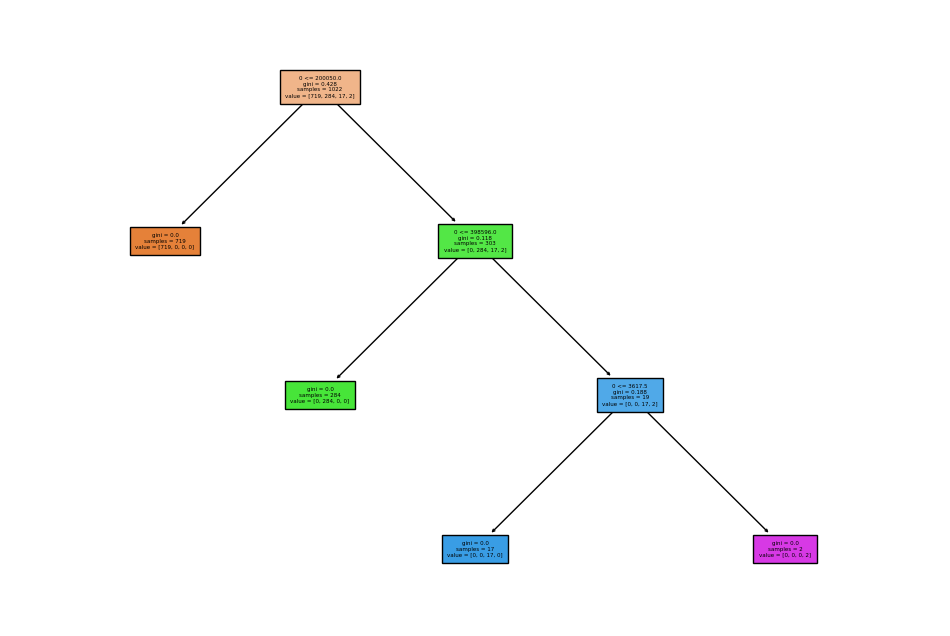

In [119]:
# Abriendo el archivo clasficado.
datos = pd.read_csv('archivo_clasificado.csv')

# Limpieza de datos.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)
cat = datos.select_dtypes(include=['object']).columns.to_list()
num = datos.select_dtypes(include=['number']).columns.to_list()

# Pasando todo a un Dataframe.
x = pd.DataFrame()
x[num] = datos[num]
x[cat] = datos[cat].apply(lambda x: pd.factorize(x)[0])
res = 'Clasificacion'
X = x.drop(res, axis=1)
y = data[res]

# Imprimiendo la clasificación.
print("Clasificación: ", y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crea un clasificador de árbol de decisión
clf = tree.DecisionTreeClassifier( max_depth=4 )

# Entrena el clasificador en el conjunto de entrenamiento
clf.fit(X_train, y_train)

# # Accurancy.
# print("Precisión:", clf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, fontsize=4, feature_names=y, filled=True)

# Ejercicio 4

#### Utilice los modelos con el conjunto de prueba y determine la eficiencia del algoritmo para predecir y clasificar.

Clasificación:  0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64
Precisión: 0.6438356164383562
Predicción: [5 5 5 6 5 8 5 5 5 5 5 5 5 5 5 5 5 5 8 7 5 5 5 5 5 6 5 5 5 5 5 5 6 5 5 5 5
 5 5 5 6 5 5 5 5 5 8 5 5 7 5 5 5 5 5 5 7 5 5 6 7 5 7 5 5 5 7 5 7 5 5 6 5 5
 6 5 5 5 5 7 5 7 7 5 7 5 5 5 5 5 5 5 5 5 5 5 5 6 7 7 5 5 7 5 7 7 5 6 5 7 7
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 5 5 5 5 7 5 8 5 5 7 5 5 5 7
 5 5 5 5 5 6 6 5 8 5 5 5 5 5 5 5 5 7 7 5 5 5 5 5 5 5 6 7 7 6 5 5 6 6 5 5 6
 5 5 5 5 5 5 7 5 5 7 5 5 7 6 6 5 5 6 5 7 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5
 7 7 5 5 5 7 7 5 5 7 5 5 5 7 5 7 5 6 5 5 5 5 6 5 5 5 7 5 8 5 6 5 5 5 8 5 5
 5 5 5 6 8 5 5 6 5 7 5 7 7 5 7 6 5 5 7 5 5 5 5 5 5 5 5 5 5 5 5 5 7 5 5 7 5
 5 5 6 5 5 7 5 5 5 6 8 6 5 5 5 5 5 6 8 5 5 5 5 5 8 5 5 6 7 5 5 5 7 5 5 5 6
 5 5 7 5 5 7 5 5 5 6 5 5 5 8 5 8 5 5 5 6 5 5 5 5 6 5 6 6 5 5 5 5 5 5 7 5 7
 5 6 5 5 5 5 5 5 5 5 5 5 7 5 6 5 5 5

[Text(0.5431034482758621, 0.9, '5 <= 1983.5\ngini = 0.639\nsamples = 1022\nvalue = [1, 5, 17, 45, 564, 187, 137, 52, 14]'),
 Text(0.27586206896551724, 0.7, '5 <= 1983.5\ngini = 0.776\nsamples = 615\nvalue = [1, 4, 17, 45, 180, 174, 130, 51, 13]'),
 Text(0.13793103448275862, 0.5, '5 <= 0.5\ngini = 0.715\nsamples = 431\nvalue = [1, 4, 16, 39, 169, 139, 56, 7, 0]'),
 Text(0.06896551724137931, 0.3, '5 <= 0.5\ngini = 0.673\nsamples = 84\nvalue = [0, 1, 1, 7, 17, 41, 17, 0, 0]'),
 Text(0.034482758620689655, 0.1, 'gini = 0.612\nsamples = 68\nvalue = [0, 0, 0, 5, 15, 38, 10, 0, 0]'),
 Text(0.10344827586206896, 0.1, 'gini = 0.734\nsamples = 16\nvalue = [0, 1, 1, 2, 2, 3, 7, 0, 0]'),
 Text(0.20689655172413793, 0.3, '5 <= 1959.5\ngini = 0.705\nsamples = 347\nvalue = [1, 3, 15, 32, 152, 98, 39, 7, 0]'),
 Text(0.1724137931034483, 0.1, 'gini = 0.778\nsamples = 162\nvalue = [1, 3, 10, 26, 50, 45, 22, 5, 0]'),
 Text(0.2413793103448276, 0.1, 'gini = 0.604\nsamples = 185\nvalue = [0, 0, 5, 6, 102, 53, 1

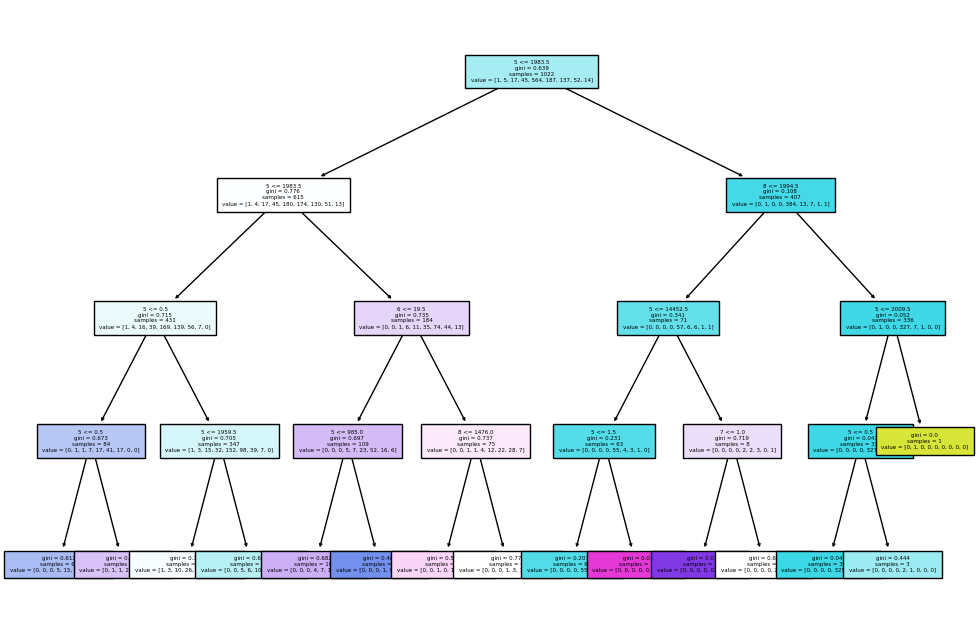

In [186]:
# Abriendo el archivo clasficado.
datos = pd.read_csv('archivo_clasificado.csv')

# Limpieza de datos.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)
cat = datos.select_dtypes(include=['object']).columns.to_list()
num = datos.select_dtypes(include=['number']).columns.to_list()

# Pasando todo a un Dataframe.
x = pd.DataFrame()
x[num] = datos[num]
x[cat] = datos[cat].apply(lambda x: pd.factorize(x)[0])
res = 'OverallCond'
X = x.drop(res, axis=1)
y = data[res]

# Imprimiendo la clasificación.
print("OverallCond: ", y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crea un clasificador de árbol de decisión
clf = tree.DecisionTreeClassifier( max_depth=4 )

# Entrena el clasificador en el conjunto de entrenamiento
clf.fit(X_train, y_train)


# Accurancy.
print("Precisión:", clf.score(X_test, y_test))

# Haciendo una predicción.
y_pred = clf.predict(X_test)

print("Predicción:", y_pred)

fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, fontsize=4, feature_names=y, filled=True)

# Ejercicio 5

#### Analice los resultados del modelo de regresión. ¿Qué tan bien le fue prediciendo?

In [184]:
# Abriendo el archivo de prueba.
datos = pd.read_csv('train.csv')

# Limpieza de datos.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)
cat = datos.select_dtypes(include=['object']).columns.to_list()
num = datos.select_dtypes(include=['number']).columns.to_list()

res = 'SalePrice'
X = x.drop(res, axis=1)

y = datos["SalePrice"].values

# Dividiendo los datos en un conjunto de prueba y entrenamiento. 
# Usando un 0.0005 de los datos para entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0005)

# Entrenar el modelo de Naive Bayes usando el conjunto de entrenamiento.
gnb = GaussianNB()
gnb.fit(X_train, y_train)

accuracy = gnb.score(X_test, y_test)

print("Accuracy:", accuracy)

# Haciendo una predicción.
y_pred = gnb.predict(X_test)

print("Predicción:", y_pred)


Accuracy: 0.0
Predicción: [186500]
